In [1]:
import pandas as pd
import numpy as np
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import confusion_matrix
from keras.utils.vis_utils import plot_model

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

from keras.utils import np_utils

import seaborn as sns
import matplotlib.pyplot as plt
import os

2022-04-27 09:27:39.727883: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
os.chdir(r"/home/jest/Documents/personal/sistemas inteligentes/proyecto/segunda entrega")

In [8]:
path_name_model = 'dataset/datos_para_modelo.csv'

In [20]:
df = pd.read_csv(path_name_model, sep='|')

In [21]:
df = df.iloc[:,1:]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4526 entries, 0 to 4525
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   estu_genero                   4526 non-null   object 
 1   estu_tieneetnia               4526 non-null   object 
 2   estu_depto_reside             4526 non-null   object 
 3   estu_mcpio_reside             4526 non-null   object 
 4   fami_estratovivienda          4526 non-null   object 
 5   fami_personashogar            4526 non-null   object 
 6   fami_cuartoshogar             4526 non-null   object 
 7   fami_tieneinternet            4526 non-null   object 
 8   fami_tieneserviciotv          4526 non-null   object 
 9   fami_tienecomputador          4526 non-null   object 
 10  fami_tienelavadora            4526 non-null   object 
 11  fami_tienehornomicroogas      4526 non-null   object 
 12  fami_tieneautomovil           4526 non-null   object 
 13  fam

In [23]:
dataset = df.values

In [24]:
X = dataset[:, :-1]
y = dataset[:,-1]
X = X.astype(str)
y = y.reshape((len(y), 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (3168, 22) (3168, 1)
Test (1358, 22) (1358, 1)


In [25]:
X_test

array([['F', 'No', 'BOLIVAR', ..., '40.0', '37.0', '41.0'],
       ['M', 'No', 'BOLIVAR', ..., '32.0', '26.0', '31.0'],
       ['F', 'No', 'BOLIVAR', ..., '45.0', '41.0', '47.0'],
       ...,
       ['F', 'No', 'BOLIVAR', ..., '45.0', '35.0', '36.0'],
       ['M', 'No', 'BOLIVAR', ..., '30.0', '40.0', '52.0'],
       ['M', 'No', 'BOLIVAR', ..., '32.0', '41.0', '52.0']], dtype='<U21')

In [40]:
oe = OrdinalEncoder()
oe.fit(X_train)
X_train_enc = oe.transform(X_train)
oe.fit(X_test)
X_test_enc = oe.transform(X_test)

In [41]:
le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)
y_train_enc = np_utils.to_categorical(y_train_enc)
y_test_enc = np_utils.to_categorical(y_test_enc)

/home/jest/anaconda3/envs/javeriana_tf/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jest/anaconda3/envs/javeriana_tf/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Modelos de redes neuronales

In [42]:
# modelo de 3 capas (1 oculta)
model = Sequential()
model.add(Dense(64, input_dim=X_train_enc.shape[1], activation='sigmoid', kernel_initializer='he_normal'))
model.add(Dense(16, input_dim=X_train_enc.shape[1], activation='sigmoid', kernel_initializer='he_normal'))
model.add(Dense(3, activation='sigmoid'))

2022-04-27 09:51:57.343746: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-04-27 09:51:57.344071: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-27 09:51:57.344083: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-27 09:51:57.344108: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jest): /proc/driver/nvidia/version does not exist
2022-04-27 09:51:57.344341: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow w

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1472      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 51        
Total params: 2,563
Trainable params: 2,563
Non-trainable params: 0
_________________________________________________________________


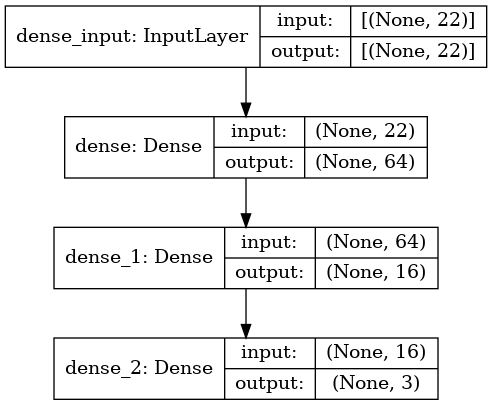

In [44]:
plot_model(model, 
         show_shapes=True, show_layer_names=True)

In [45]:
%%time
# compile the keras model
model.compile(loss='KLDivergence', optimizer='ftrl', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train_enc, y_train_enc, epochs=10, batch_size=16, verbose=2)
# evaluate the keras model
_, accuracy = model.evaluate(X_test_enc, y_test_enc, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))


## ['binary_crossentropy', ' categorical_crossentropy']
#['sgd', 'adam', 'ftrl', 'RMSprop']
#from keras.optimizers import 

2022-04-27 09:52:35.449965: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-04-27 09:52:35.474356: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2299965000 Hz


Epoch 1/10
198/198 - 0s - loss: 0.6498 - accuracy: 0.2762
Epoch 2/10
198/198 - 0s - loss: 0.5891 - accuracy: 0.4874
Epoch 3/10
198/198 - 0s - loss: 0.5482 - accuracy: 0.5499
Epoch 4/10
198/198 - 0s - loss: 0.5125 - accuracy: 0.5499
Epoch 5/10
198/198 - 0s - loss: 0.4787 - accuracy: 0.5499
Epoch 6/10
198/198 - 0s - loss: 0.4465 - accuracy: 0.5499
Epoch 7/10
198/198 - 0s - loss: 0.4164 - accuracy: 0.5499
Epoch 8/10
198/198 - 0s - loss: 0.3888 - accuracy: 0.5499
Epoch 9/10
198/198 - 0s - loss: 0.3638 - accuracy: 0.5499
Epoch 10/10
198/198 - 0s - loss: 0.3412 - accuracy: 0.5499
Accuracy: 54.27
CPU times: user 1.89 s, sys: 161 ms, total: 2.05 s
Wall time: 1.34 s


In [46]:
def create_model(neurons=4, activation='relu', 
                 loss_='binary_crossentropy',
                 optimizer_='adam'):
	# create model
	model = Sequential()
	model.add(Dense(neurons*2, input_dim=X_train_enc.shape[1], activation=activation, kernel_initializer='he_normal'))
	model.add(Dense(neurons, input_dim=X_train_enc.shape[1], activation=activation, kernel_initializer='he_normal'))
	model.add(Dense(neurons, input_dim=X_train_enc.shape[1], activation=activation, kernel_initializer='he_normal'))
	model.add(Dense(3, kernel_initializer='uniform', activation='softmax'))
	# Compile model
	model.compile(loss=loss_, optimizer=optimizer_, metrics=['accuracy'])
	return model

# Validacion seleccion funcion de activacion y Optimizador 

In [47]:
%%time 
# Modelo validando optimizador sobre número de neuronas
model = KerasClassifier(build_fn=create_model, epochs=30, batch_size=50)
neurons = [16,32,64,128,256]
activation = ['relu', 'tanh', 'sigmoid']
loss_ = ['binary_crossentropy']
optimizer_ = ['sgd', 'adam', 'ftrl', 'RMSprop']
param_grid = dict(neurons=neurons, activation=activation,
                 loss_=loss_,optimizer_=optimizer_)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3,   return_train_score = True)
grid_result = grid.fit(X_train_enc, y_train_enc)

2022-04-27 09:53:16.301748: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-04-27 09:53:16.353060: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-04-27 09:53:16.385739: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-04-27 09:53:16.404666: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-04-27 09:53:16.428520: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-04-27 09:53:16.439741: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-04-27 09:53:16.464831: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic libr

Epoch 1/30
43/43 [==============================] - 1s 2ms/step - loss: 0.9178 - accuracy: 0.4879
Epoch 2/30
43/43 [==============================] - 1s 2ms/step - loss: 0.6059 - accuracy: 0.5120
Epoch 1/30
43/43 [==============================] - 1s 3ms/step - loss: 0.6816 - accuracy: 0.4958
Epoch 2/30
43/43 [==============================] - 0s 2ms/step - loss: 0.5120 - accuracy: 0.6267
Epoch 3/30
43/43 [==============================] - 0s 2ms/step - loss: 0.4865 - accuracy: 0.6554
Epoch 3/30
43/43 [==============================] - 1s 2ms/step - loss: 0.6556 - accuracy: 0.5433
Epoch 2/30
43/43 [==============================] - 1s 3ms/step - loss: 0.8954 - accuracy: 0.2999
Epoch 2/30
43/43 [==============================] - 0s 3ms/step - loss: 0.4086 - accuracy: 0.7174
Epoch 5/30
43/43 [==============================] - 0s 3ms/step - loss: 0.3767 - accuracy: 0.7259
Epoch 5/30
43/43 [==============================] - 1s 2ms/step - loss: 0.8572 - accuracy: 0.2042
Epoch 2/30
43/43 [==

/home/jest/anaconda3/envs/javeriana_tf/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
/home/jest/anaconda3/envs/javeriana_tf/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
/home/jest/anaconda3/envs/javeriana_tf/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
/home/jest/anaconda3/envs/javeriana_tf/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a fut

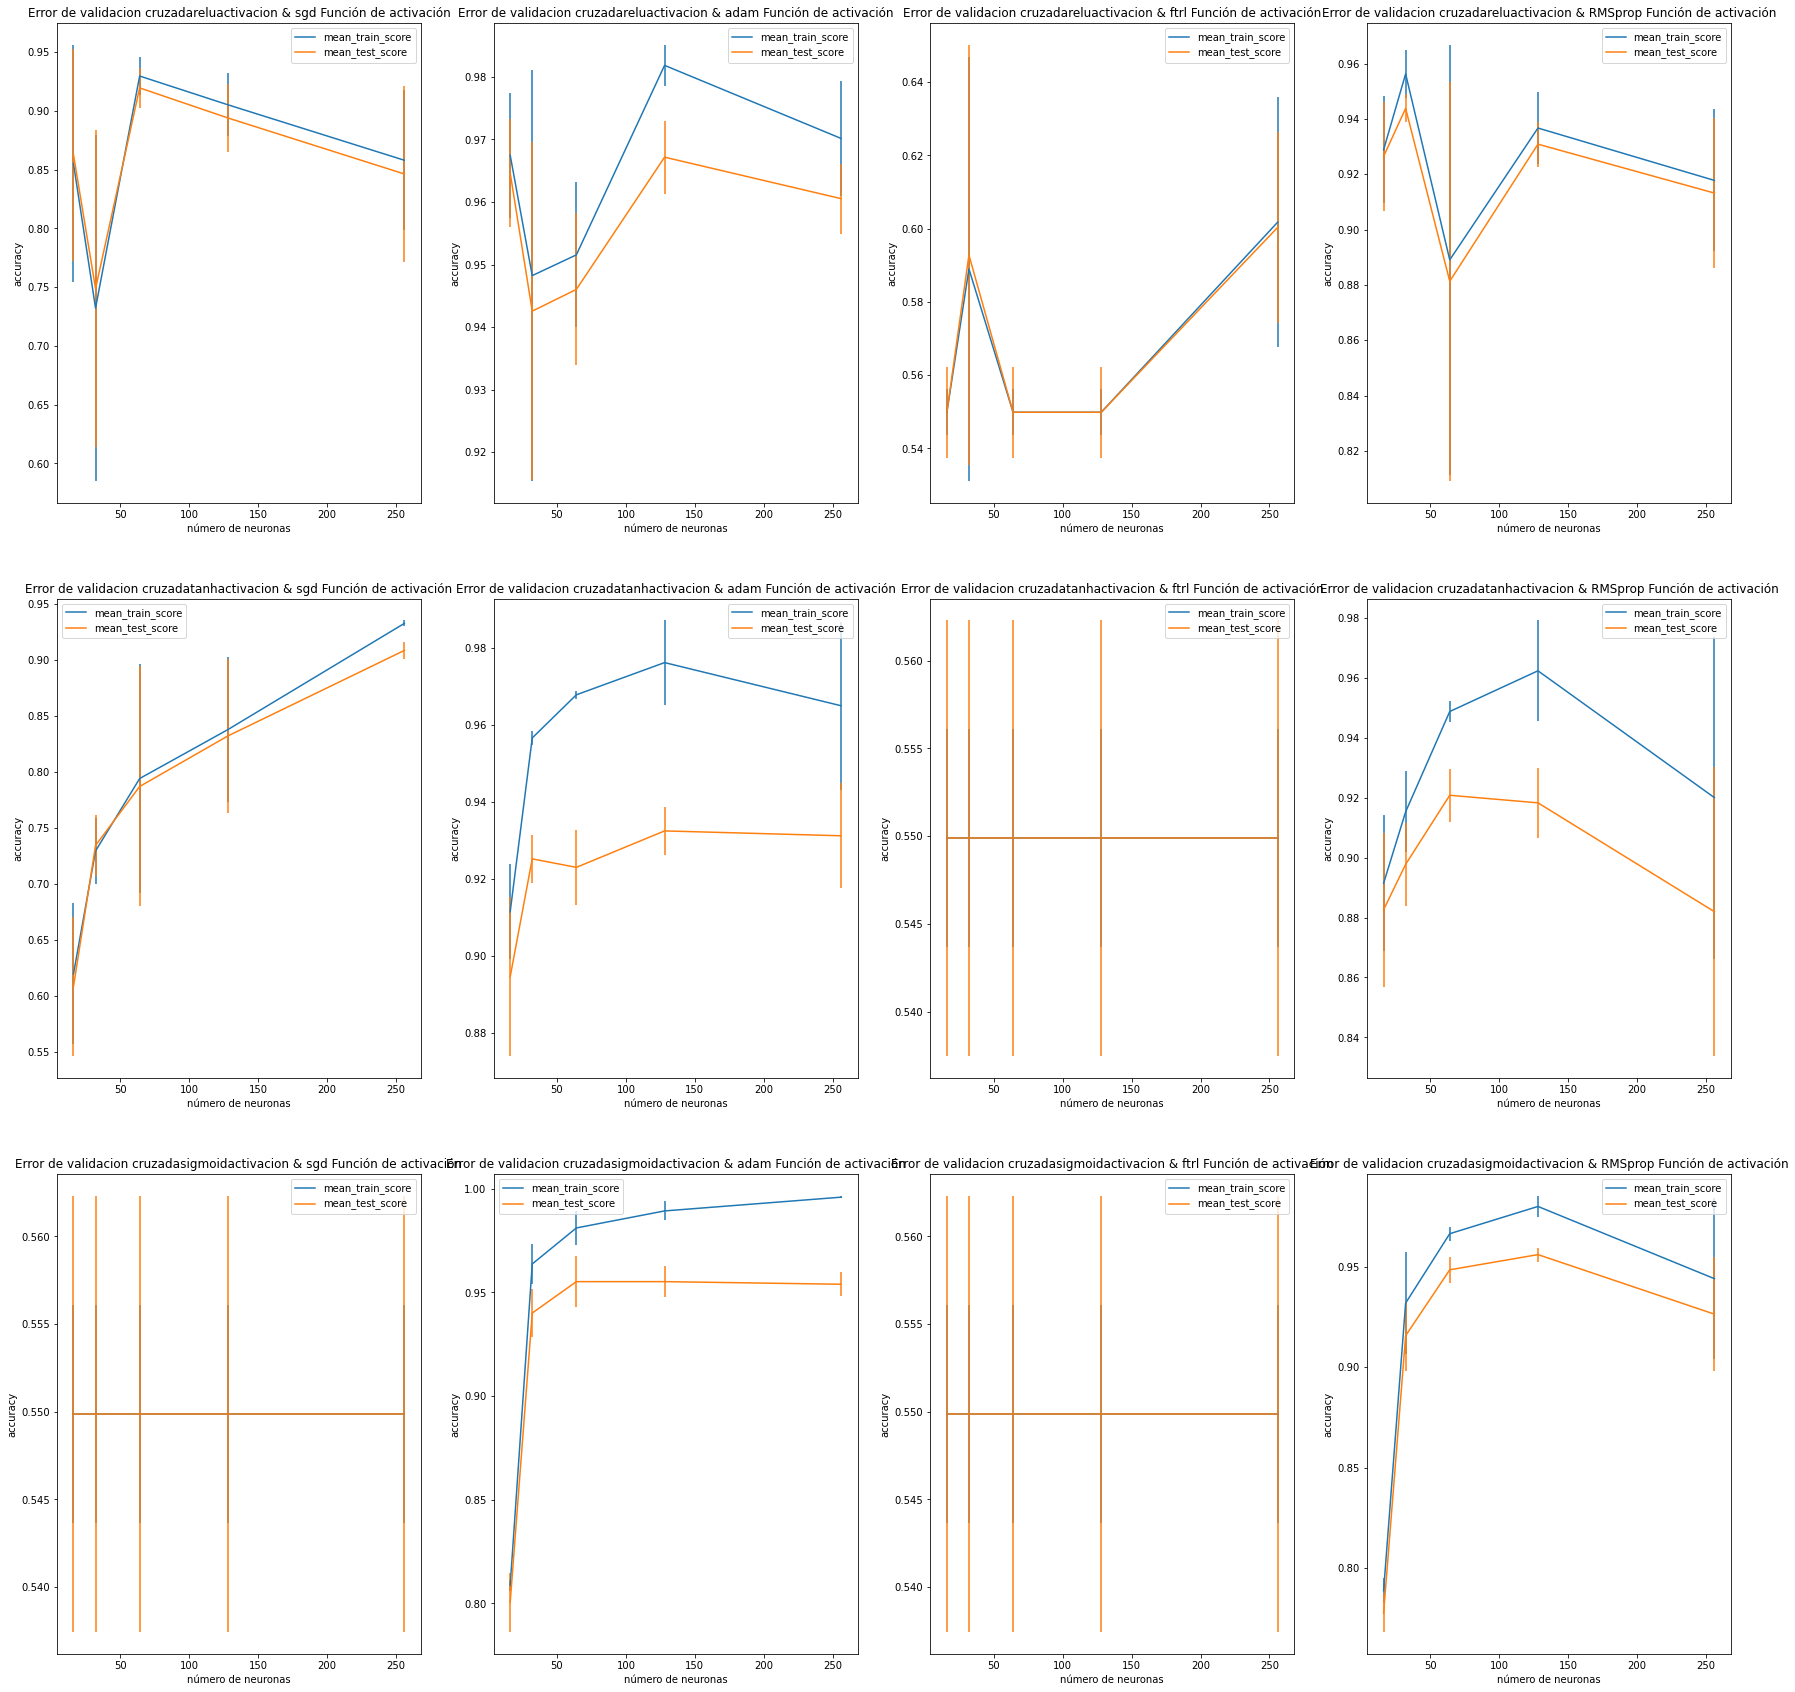

In [53]:
#import matplotlib.pyplot as plt
# metricas para validacion
scores = pd.DataFrame(grid.cv_results_)
len_acti = len(scores.param_activation.unique())
len_opti = len(scores.param_optimizer_.unique())

fig, ax = plt.subplots(len_acti, len_opti, figsize=(30, 30))
for i in range(len_acti):
    for j in range(len_opti):
        idd = (scores.param_activation==scores.param_activation.unique()[i]) & (scores.param_optimizer_==scores.param_optimizer_.unique()[j]) 
        scores.loc[idd].plot(x='param_neurons', y='mean_train_score', yerr='std_train_score', ax=ax[i,j])
        scores.loc[idd].plot(x='param_neurons', y='mean_test_score', yerr='std_test_score', ax=ax[i,j])
        ax[i,j].set_ylabel('accuracy')
        ax[i,j].set_xlabel('número de neuronas')
        ax[i,j].set_title('Error de validacion cruzada' + scores.param_activation.unique()[i] +
                     'activacion & ' + scores.param_optimizer_.unique()[j] + ' Función de activación');
        

In [56]:
os.getcwd()

'/home/jest/Documents/personal/sistemas inteligentes/proyecto/segunda entrega'

In [58]:
temp_path= '/home/jest/Documents/personal/sistemas inteligentes/proyecto'
temp_path = temp_path + '/sistemas_inteligentes/imagenes_cnn/'
fig.savefig(temp_path + 'validacion_cruzada_decision_activacion_optimizador.png')

In [60]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
result = pd.DataFrame(params)
result['means'] = means*100
result.loc[result.means.isnull() == False].head()

Best: 0.967172 using {'activation': 'relu', 'loss_': 'binary_crossentropy', 'neurons': 128, 'optimizer_': 'adam'}


,activation,loss_,neurons,optimizer_,means
0,relu,binary_crossentropy,16,sgd,86.268942
1,relu,binary_crossentropy,16,adam,96.464646
2,relu,binary_crossentropy,16,ftrl,54.987375
3,relu,binary_crossentropy,16,RMSprop,92.645202
4,relu,binary_crossentropy,32,sgd,74.873737


In [61]:
temp_path= '/home/jest/Documents/personal/sistemas inteligentes/proyecto'
temp_path = temp_path + '/sistemas_inteligentes/imagenes_cnn/'
result.loc[result.means.isnull() == False].to_csv(temp_path +'resultados_seleccionando_activacion_optimizador.cvs')

# Modelo validando número de epocas

In [62]:
%%time 
# Modelo validando optimizador sobre número de neuronas
model = KerasClassifier(build_fn=create_model, batch_size=50)
neurons = [16,32,64,128, 256]
activation = ['relu', 'tanh', 'sigmoid']
loss_ = ['binary_crossentropy']
optimizer_ = ['sgd', 'adam', 'ftrl', 'RMSprop']
epochs = [5,10,15,20,25,30]
param_grid = dict(neurons=neurons, activation=activation,
                 loss_=loss_,optimizer_=optimizer_,
                 epochs= epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3,   return_train_score = True)
grid_result = grid.fit(X_train_enc, y_train_enc)

2022-04-27 10:15:03.551808: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-04-27 10:15:03.577281: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-04-27 10:15:03.616499: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-04-27 10:15:03.629607: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-04-27 10:15:03.665629: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-04-27 10:15:03.681217: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-04-27 10:15:03.695964: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic libr

Epoch 1/5
43/43 [==============================] - 1s 2ms/step - loss: 1.8256 - accuracy: 0.4917
Epoch 2/5
43/43 [==============================] - 0s 2ms/step - loss: 0.5364 - accuracy: 0.5848
Epoch 3/5
43/43 [==============================] - 1s 2ms/step - loss: 0.5723 - accuracy: 0.5985
Epoch 2/5
43/43 [==============================] - 0s 3ms/step - loss: 0.4929 - accuracy: 0.6382
Epoch 3/5
43/43 [==============================] - 1s 2ms/step - loss: 1.0468 - accuracy: 0.4686
Epoch 2/5
43/43 [==============================] - 0s 2ms/step - loss: 0.4445 - accuracy: 0.6680
Epoch 5/5
43/43 [==============================] - 0s 2ms/step - loss: 0.4731 - accuracy: 0.6819
Epoch 4/5
43/43 [==============================] - 1s 3ms/step - loss: 0.7167 - accuracy: 0.4233
Epoch 2/5
43/43 [==============================] - 0s 2ms/step - loss: 0.4522 - accuracy: 0.6746
Epoch 3/5
43/43 [==============================] - 0s 2ms/step - loss: 0.3678 - accuracy: 0.7318
Epoch 2/5
43/43 [=============

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



43/43 [==============================] - 0s 3ms/step - loss: 0.0940 - accuracy: 0.9372
Epoch 30/30
43/43 [==============================] - 0s 6ms/step - loss: 0.6818 - accuracy: 0.5412
Epoch 1/30
43/43 [==============================] - 0s 3ms/step - loss: 0.2006 - accuracy: 0.8952
Epoch 6/30
43/43 [==============================] - 0s 5ms/step - loss: 0.5089 - accuracy: 0.5530
Epoch 4/30
43/43 [==============================] - 1s 4ms/step - loss: 0.6564 - accuracy: 0.4383
Epoch 2/30
43/43 [==============================] - 0s 4ms/step - loss: 0.1675 - accuracy: 0.9040
Epoch 7/30
43/43 [==============================] - 0s 4ms/step - loss: 0.5526 - accuracy: 0.5552
Epoch 3/30
43/43 [==============================] - 0s 6ms/step - loss: 0.4704 - accuracy: 0.6742
Epoch 5/30
43/43 [==============================] - 0s 4ms/step - loss: 0.1662 - accuracy: 0.9043
Epoch 8/30
43/43 [==============================] - 0s 5ms/step - loss: 0.5191 - accuracy: 0.5468
Epoch 5/30
43/43 [============

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [63]:
scores = pd.DataFrame(grid.cv_results_)

In [64]:
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_epochs,param_loss_,param_neurons,param_optimizer_,params,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.515802,0.070398,0.405350,0.045819,relu,5,binary_crossentropy,16,sgd,"{'activation': 'relu', 'epochs': 5, 'loss_': '...",...,0.810606,0.664773,0.734848,0.059672,209,0.739583,0.784564,0.684186,0.736111,0.041053
1,1.808758,0.083050,0.414285,0.023155,relu,5,binary_crossentropy,16,adam,"{'activation': 'relu', 'epochs': 5, 'loss_': '...",...,0.906250,0.841856,0.873422,0.026304,129,0.868845,0.887311,0.854167,0.870107,0.013560
2,1.674793,0.089851,0.421707,0.053838,relu,5,binary_crossentropy,16,ftrl,"{'activation': 'relu', 'epochs': 5, 'loss_': '...",...,0.567235,0.538826,0.549874,0.012427,245,0.553030,0.541193,0.555398,0.549874,0.006214
3,1.794210,0.050199,0.355469,0.024311,relu,5,binary_crossentropy,16,RMSprop,"{'activation': 'relu', 'epochs': 5, 'loss_': '...",...,0.740530,0.832386,0.786301,0.037501,183,0.807765,0.713542,0.820076,0.780461,0.047585
4,1.321038,0.072483,0.371126,0.067576,relu,5,binary_crossentropy,32,sgd,"{'activation': 'relu', 'epochs': 5, 'loss_': '...",...,0.767045,0.766098,0.770202,0.005148,191,0.795455,0.736742,0.802557,0.778251,0.029494


In [65]:
print(scores.param_activation.unique())
print(scores.param_optimizer_.unique())
print(scores.param_neurons.unique())

['relu' 'tanh' 'sigmoid']
['sgd' 'adam' 'ftrl' 'RMSprop']
[16 32 64 128 256]


In [ ]:
#Resultados de la validacion anterior
#Best: 0.513514 using {'activation': 'sigmoid', 'loss_': 'binary_crossentropy', 'neurons': 64, 'optimizer_': 'RMSprop'}

/home/jest/anaconda3/envs/javeriana_tf/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
/home/jest/anaconda3/envs/javeriana_tf/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
/home/jest/anaconda3/envs/javeriana_tf/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
/home/jest/anaconda3/envs/javeriana_tf/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a fut

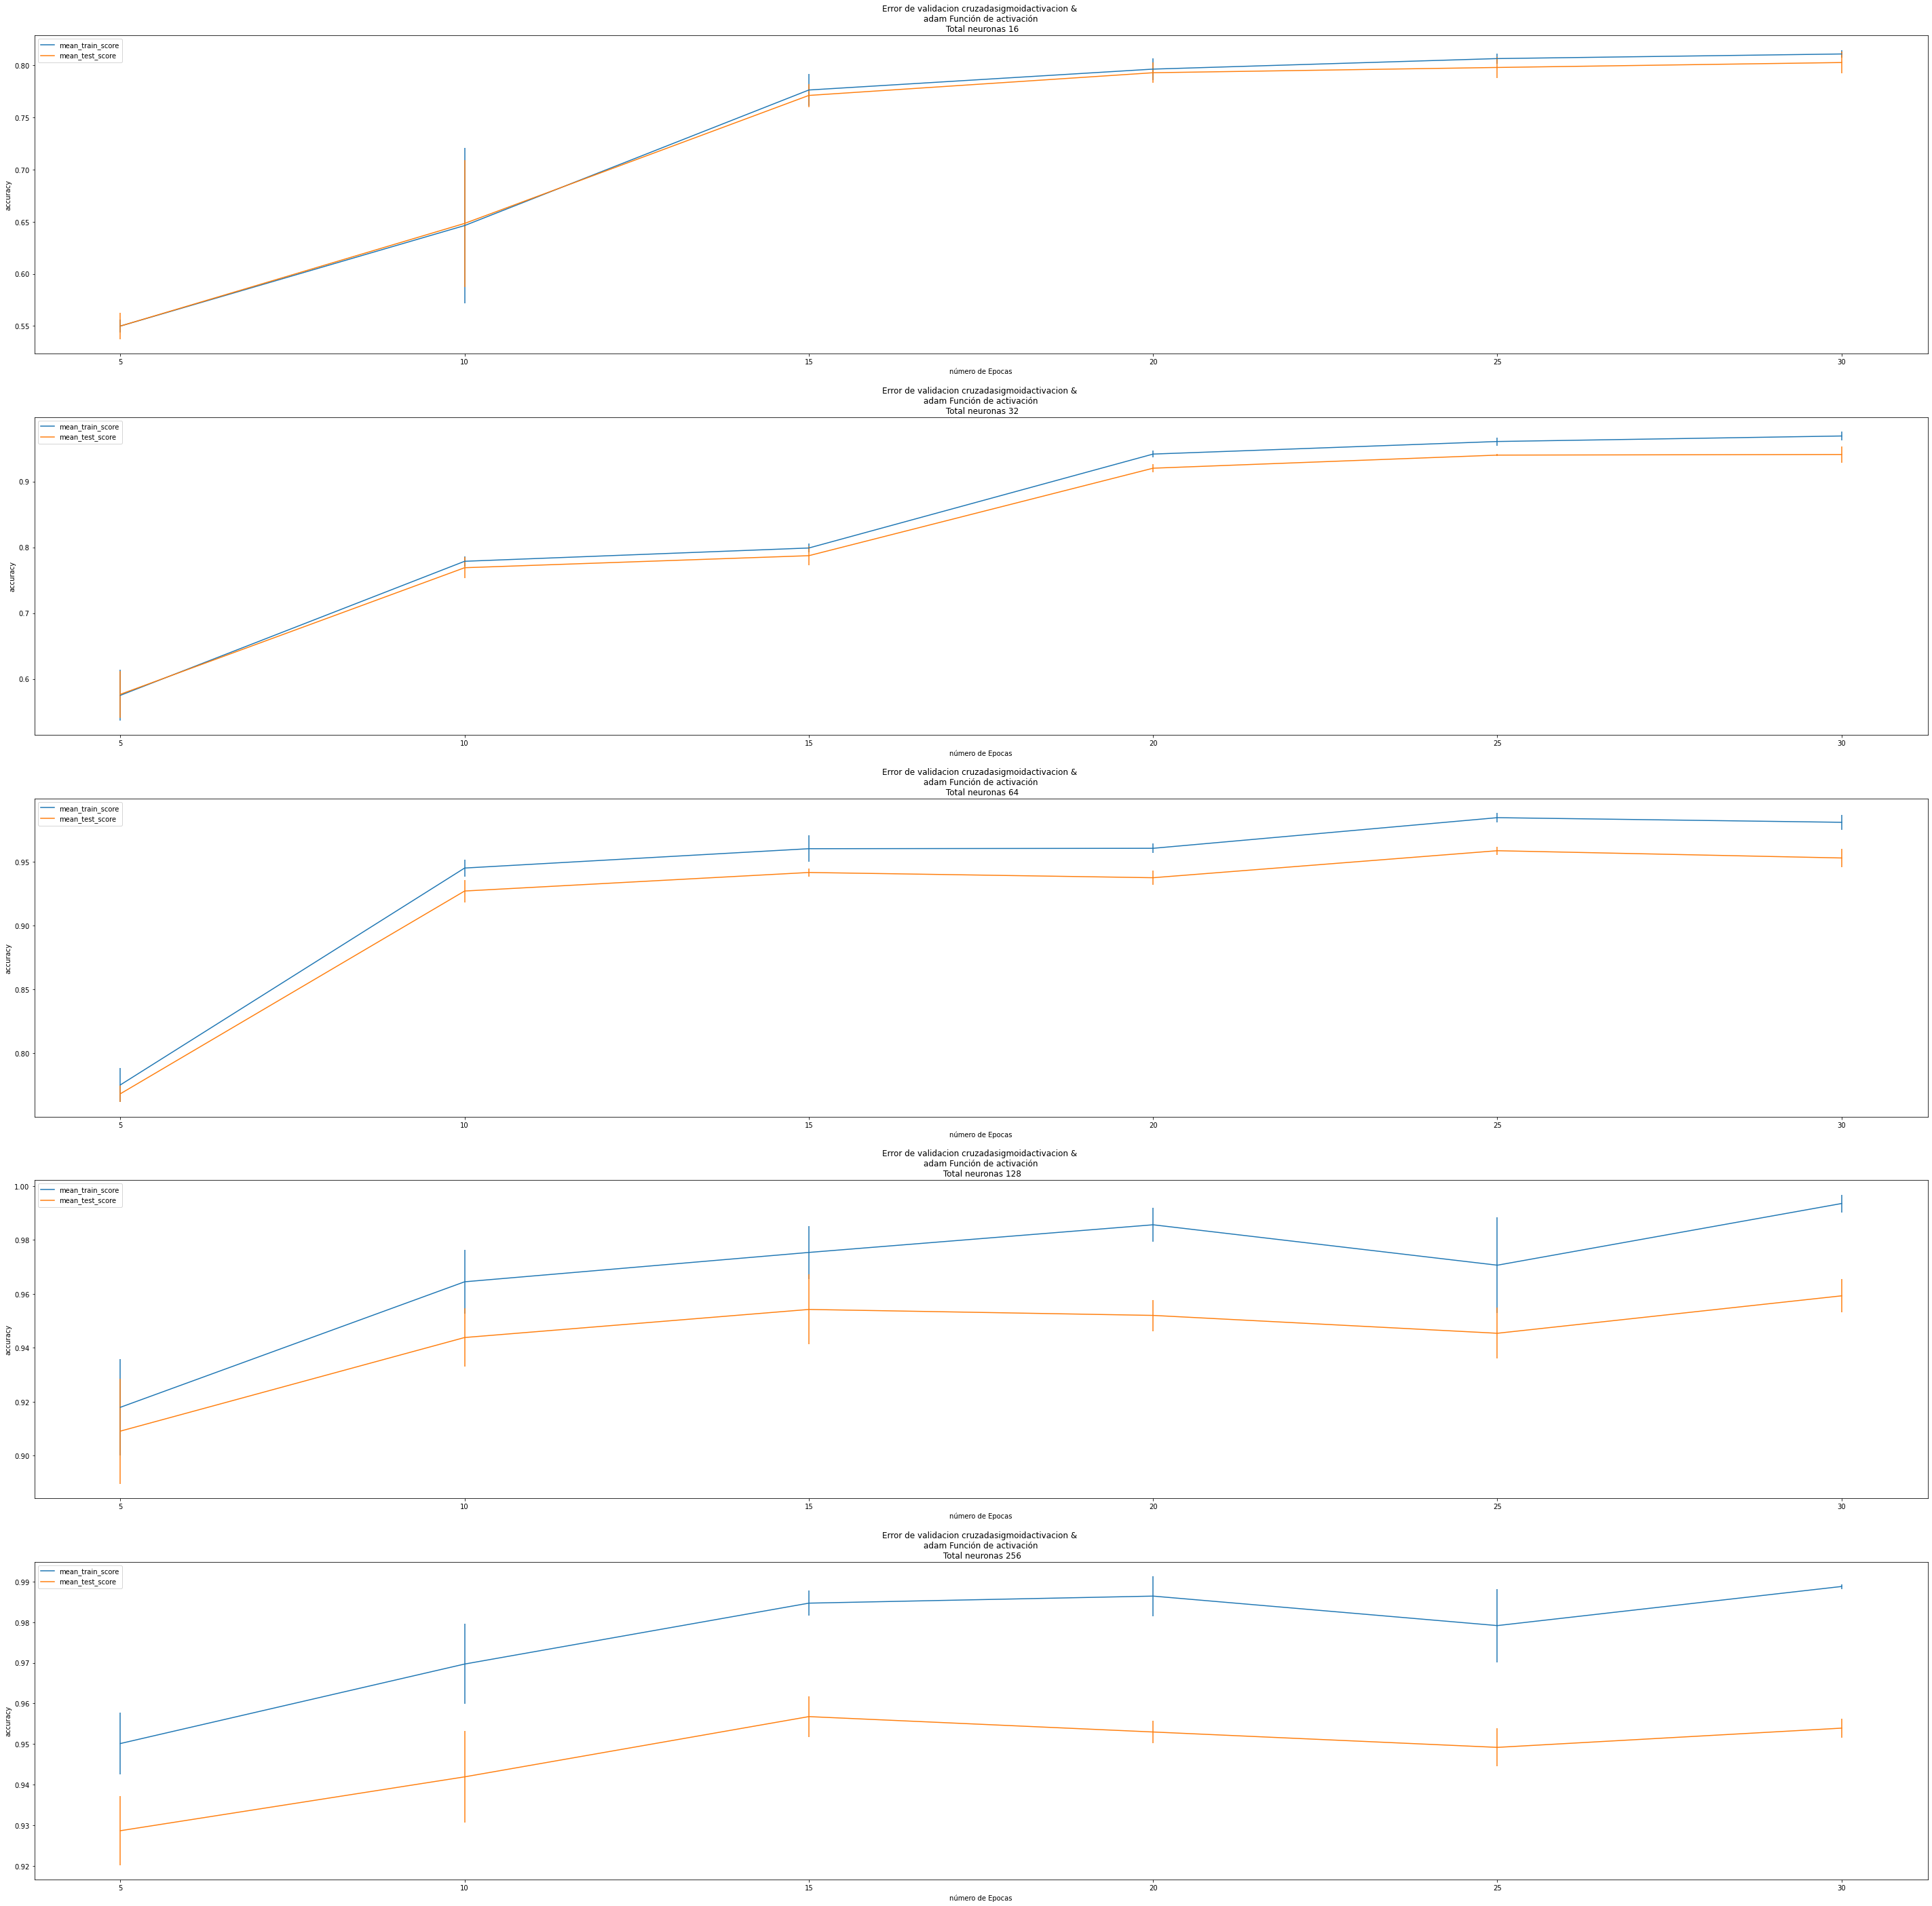

In [66]:
#import matplotlib.pyplot as plt
# metricas para validacion


acti_select = 'sigmoid'
opti_select = 'adam'
len_neurons = scores.param_neurons.unique()

fig, ax = plt.subplots(len(len_neurons), figsize=(50, 50))

for i in range(len(len_neurons)):
    idd = (scores.param_activation==acti_select) & (scores.param_optimizer_==opti_select) 
    idd = idd & (scores.param_neurons == scores.param_neurons.unique()[i])
    scores.loc[idd].plot(x='param_epochs', y='mean_train_score', yerr='std_train_score', ax=ax[i])
    scores.loc[idd].plot(x='param_epochs', y='mean_test_score', yerr='std_test_score', ax=ax[i])
    ax[i].set_ylabel('accuracy')
    ax[i].set_xlabel('número de Epocas')
    ax[i].set_title('Error de validacion cruzada' + acti_select +
                 'activacion & \n ' + opti_select + ' Función de activación \n' +
                     ' Total neuronas '+ str(scores.param_neurons.unique()[i]));
        

In [67]:
temp_path= '/home/jest/Documents/personal/sistemas inteligentes/proyecto'
temp_path = temp_path + '/sistemas_inteligentes/imagenes_cnn/'
fig.savefig(temp_path+'validacion_cruzada_decision_epocas.png')

In [68]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
result = pd.DataFrame(params)
result['means'] = means*100
result.loc[result.means.isnull() == False].head()

Best: 0.971275 using {'activation': 'relu', 'epochs': 25, 'loss_': 'binary_crossentropy', 'neurons': 32, 'optimizer_': 'adam'}


,activation,epochs,loss_,neurons,optimizer_,means
0,relu,5,binary_crossentropy,16,sgd,73.484850
1,relu,5,binary_crossentropy,16,adam,87.342171
2,relu,5,binary_crossentropy,16,ftrl,54.987375
3,relu,5,binary_crossentropy,16,RMSprop,78.630052
4,relu,5,binary_crossentropy,32,sgd,77.020202


In [69]:
result.loc[result.means.isnull() == False].shape

(360, 6)

In [188]:
# exportando matriz de resultados 

In [70]:
temp_path= '/home/jest/Documents/personal/sistemas inteligentes/proyecto'
temp_path = temp_path + '/sistemas_inteligentes/imagenes_cnn/'
result.loc[result.means.isnull() == False].to_csv(temp_path+'resultados_seleccionando_epocas.csv')

# Validaciones Varias


/home/jest/anaconda3/envs/javeriana_tf/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
/home/jest/anaconda3/envs/javeriana_tf/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


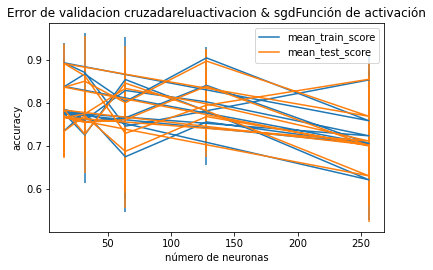

In [71]:
# metricas para validacion
fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)

i = 0
idd = (scores.param_activation==scores.param_activation.unique()[i]) & (scores.param_optimizer_==scores.param_optimizer_.unique()[i])
scores.loc[idd].plot(x='param_neurons', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.loc[idd].plot(x='param_neurons', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_ylabel('accuracy')
ax.set_xlabel('número de neuronas')
ax.set_title('Error de validacion cruzada' + scores.param_activation.unique()[i] +
             'activacion & ' + scores.param_optimizer_.unique()[i] + 'Función de activación');

/home/jest/anaconda3/envs/javeriana_tf/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
/home/jest/anaconda3/envs/javeriana_tf/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


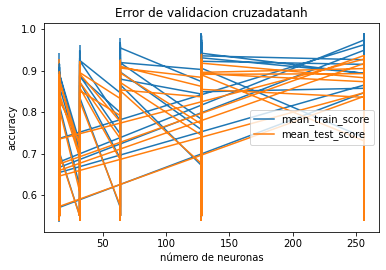

In [72]:
# metricas para validacion
fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)

scores.loc[scores.param_activation=='tanh'].plot(x='param_neurons', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.loc[scores.param_activation=='tanh'].plot(x='param_neurons', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_ylabel('accuracy')
ax.set_xlabel('número de neuronas')
ax.set_title('Error de validacion cruzada' + 'tanh');

/home/jest/anaconda3/envs/javeriana_tf/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
/home/jest/anaconda3/envs/javeriana_tf/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


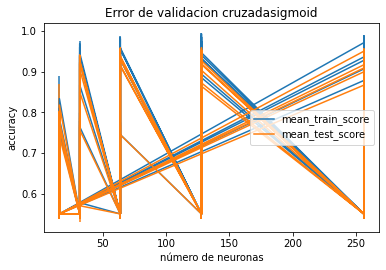

In [73]:
# metricas para validacion
fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)

scores.loc[scores.param_activation=='sigmoid'].plot(x='param_neurons', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.loc[scores.param_activation=='sigmoid'].plot(x='param_neurons', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_ylabel('accuracy')
ax.set_xlabel('número de neuronas')
ax.set_title('Error de validacion cruzada' + 'sigmoid');